## Load the data

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load training data

In [234]:
train_identity_df = pd.read_csv('./ieee-fraud-detection/train_identity.csv')

train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [235]:
train_transaction_df = pd.read_csv('./ieee-fraud-detection/train_transaction.csv')

train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
print(f'{train_identity_df.shape = }')
print(f'{train_transaction_df.shape = }')

train_identity_df.shape = (144233, 41)
train_transaction_df.shape = (590540, 394)


### Load test data

In [237]:
test_identity_df = pd.read_csv('./ieee-fraud-detection/test_identity.csv')

test_identity_df.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [238]:
test_transaction_df = pd.read_csv('./ieee-fraud-detection/test_transaction.csv')

test_transaction_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
print(f'{test_identity_df.shape = }')
print(f'{test_transaction_df.shape = }')

test_identity_df.shape = (141907, 41)
test_transaction_df.shape = (506691, 393)


### Join the identity and transaction tables

In [240]:
train_df = train_transaction_df.merge(train_identity_df, on='TransactionID', how='left')
test_df = test_transaction_df.merge(test_identity_df, on='TransactionID', how='left')

In [241]:
print(f'{train_df.shape =}')
train_df.head()

train_df.shape =(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [242]:
print(f'{test_df.shape = }')
test_df.head()

test_df.shape = (506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

### Check the distribution of training and test data time

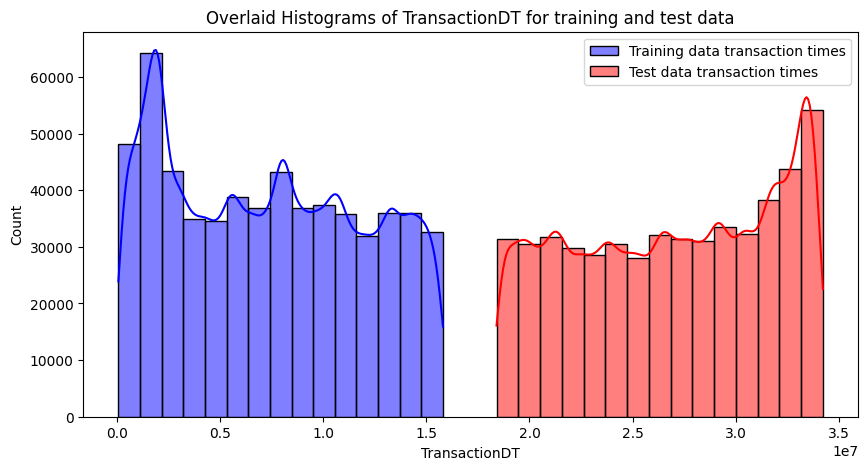

In [243]:
plt.figure(figsize=(10, 5))

sns.histplot(train_df['TransactionDT'], bins=15, kde=True, color='blue', label='Training data transaction times', alpha=0.5)
sns.histplot(test_df['TransactionDT'], bins=15, kde=True, color='red', label='Test data transaction times', alpha=0.5)

plt.title('Overlaid Histograms of TransactionDT for training and test data')
plt.legend(loc='upper right')
plt.show()

We notice that the training and the test transactions are separated in time, which is good for an unbiased evaluation of the models. We need to maintain the same property for the validation set as well. Towards that end we sort the train data frame based on the TransactionDT column.

In [244]:
train_df.sort_values(by='TransactionDT', inplace=True)

### Check the distribution of labels

isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64


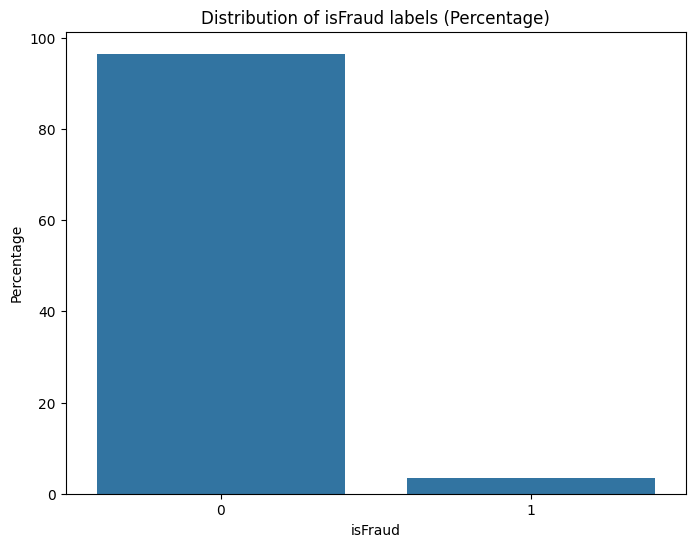

In [245]:
label_percentages = train_df['isFraud'].value_counts(normalize=True) * 100
print(label_percentages)

plt.figure(figsize=(8, 6))
sns.barplot(x=label_percentages.index, y=label_percentages.values)
plt.title('Distribution of isFraud labels (Percentage)')
plt.xlabel('isFraud')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Based on the above plot, it can be concluded that the data is high imbalanced since ~96% of the samples are non-fraudulant.

In [282]:
def plot_key_and_fraud_distribution(df, key, width=8):
    fraud_counts = df.groupby([key, 'isFraud']).size().unstack(fill_value=0)
    if fraud_counts.shape[1] == 1:
        fraud_counts[1 - fraud_counts.columns[0]] = 0
    
    # Reorder the columns and rename them
    fraud_counts = fraud_counts[[0, 1]]
    fraud_counts.columns = ['No Fraud', 'Fraud']

    fraud_counts.columns = ['No Fraud', 'Fraud']

    # Calculate total counts and proportions
    total_counts = fraud_counts.sum(axis=1)
    fraud_proportions = fraud_counts['Fraud'] / total_counts

    # Plotting
    fig, ax1 = plt.subplots(figsize=(width, 6))

    bar_width = 0.4
    x_positions = range(len(total_counts))

    # Plot total counts as bars
    ax1.bar(x_positions, total_counts, width=bar_width, color='lightblue', label='Number of Transactions', align='center')
    ax1.set_ylabel('Number of Transactions')
    ax1.tick_params(axis='y')
    ax1.set_xlabel(key)
    ax1.set_title(f'Total Transactions and Fraud Proportion by Feature {key}')
    
    # Create a second y-axis for the fraud proportion
    ax2 = ax1.twinx()
    ax2.plot(x_positions, fraud_proportions, color='red', marker='o', label='Fraud Proportion', linewidth=2)
    ax2.set_ylabel('Fraud Proportion')

    ylim = fraud_proportions.max()
    ax2.set_ylim(0, ylim + 0.2)
    
    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    # Set x-ticks to match the categories
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(fraud_counts.index, rotation=90)

    plt.show()
    

### Distribution of labels with respect to payment information

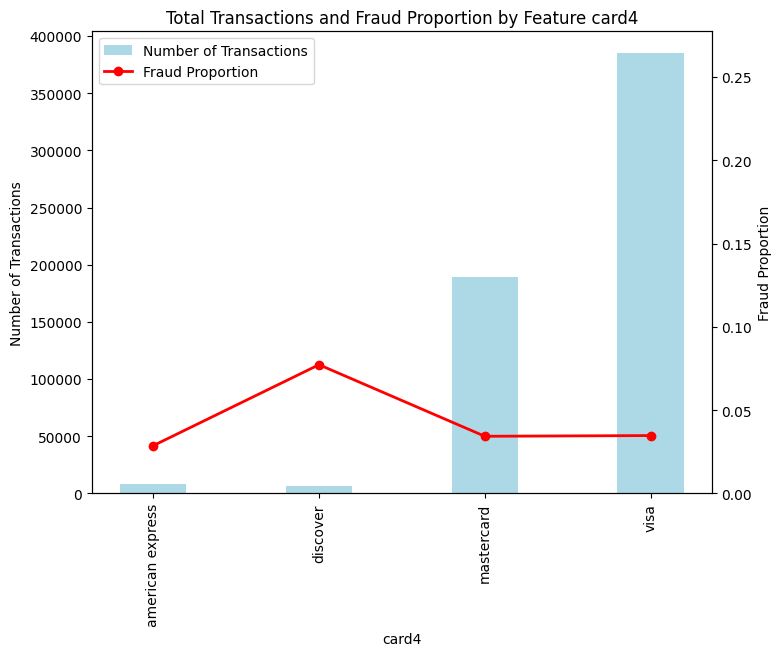

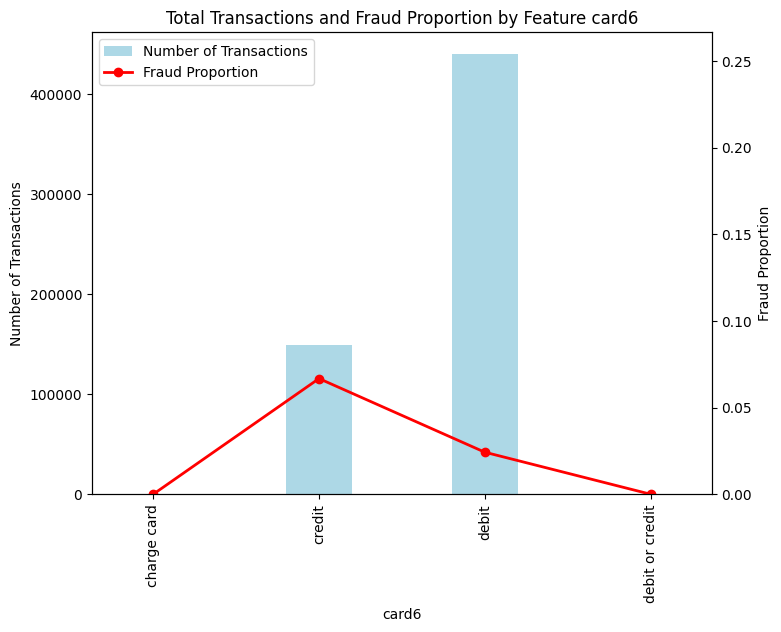

In [283]:
for i in [4, 6]:
    key = f'card{i}'
    plot_key_and_fraud_distribution(train_df, key)

### Distribution of labels with respect to email domains

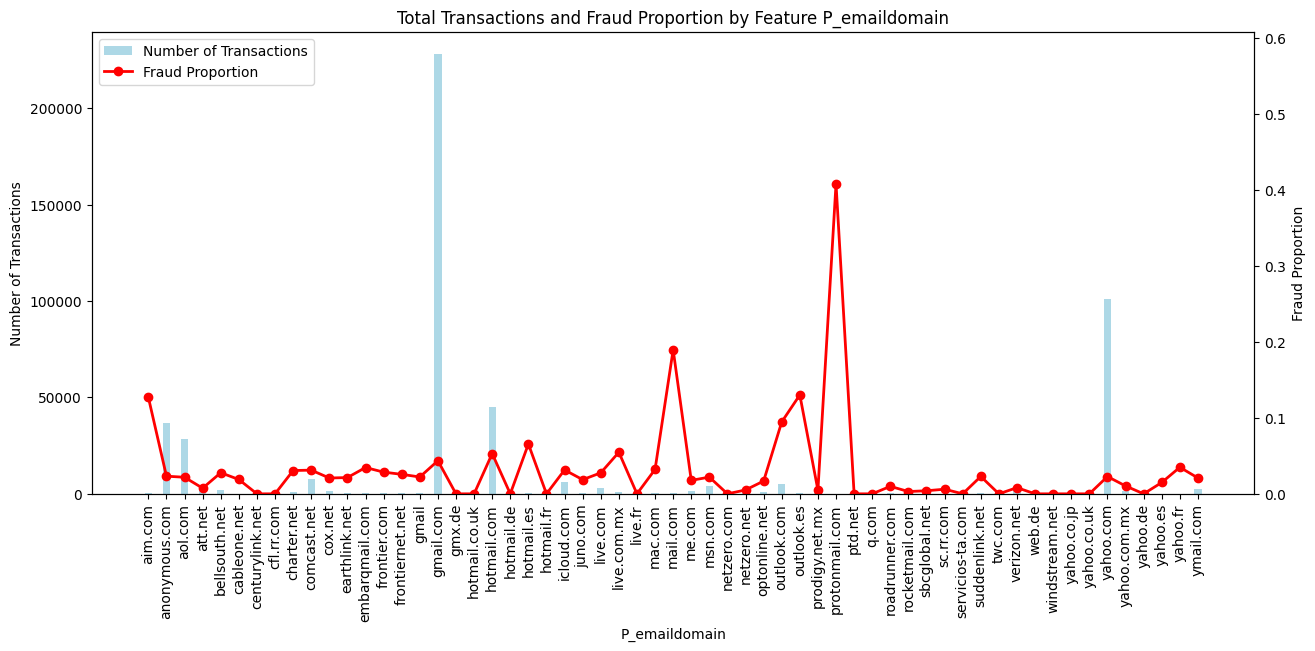

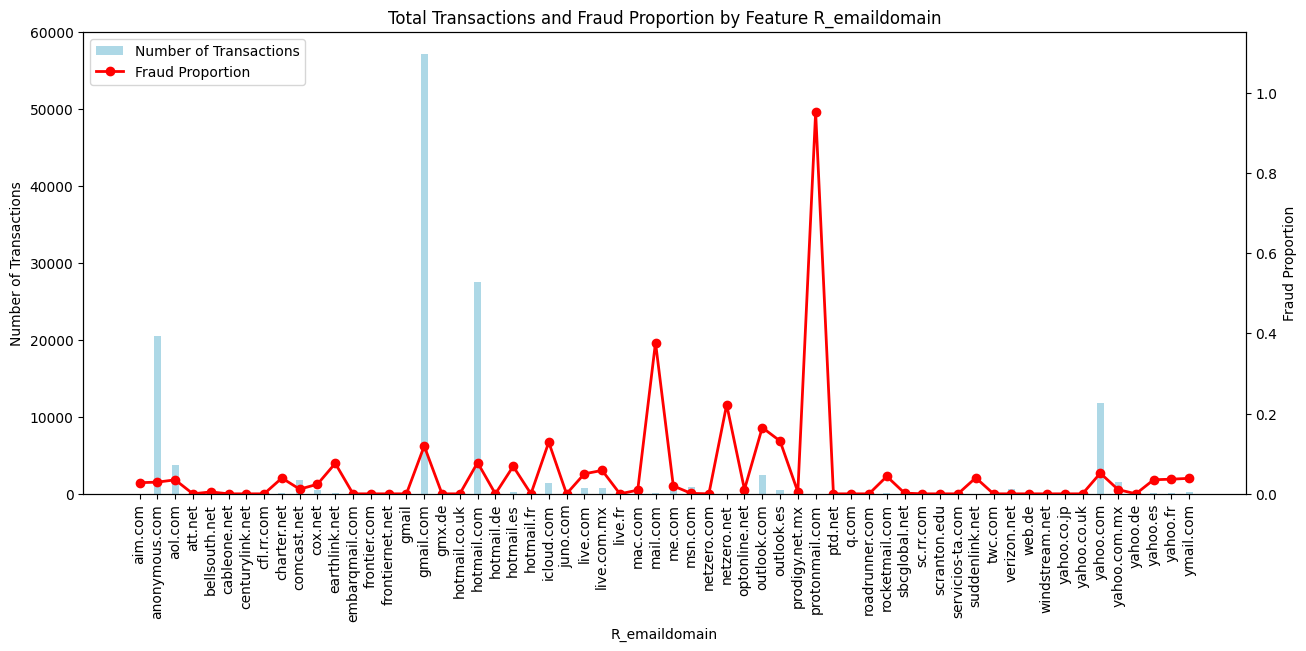

In [284]:
for i in ['P', 'R']:
    key = f'{i}_emaildomain'
    plot_key_and_fraud_distribution(train_df, key, width=15)

### Fraud distribution based on product type

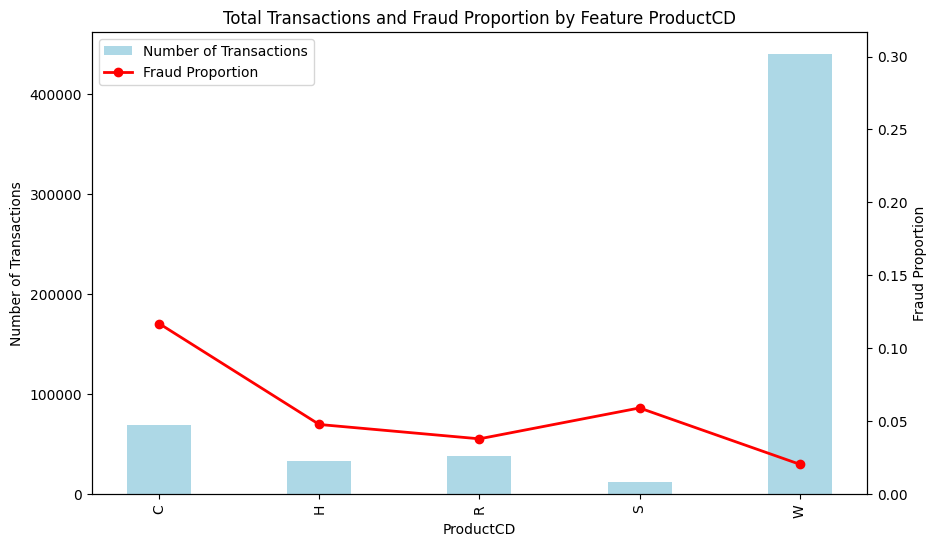

In [285]:
plot_key_and_fraud_distribution(train_df, 'ProductCD', width=10)

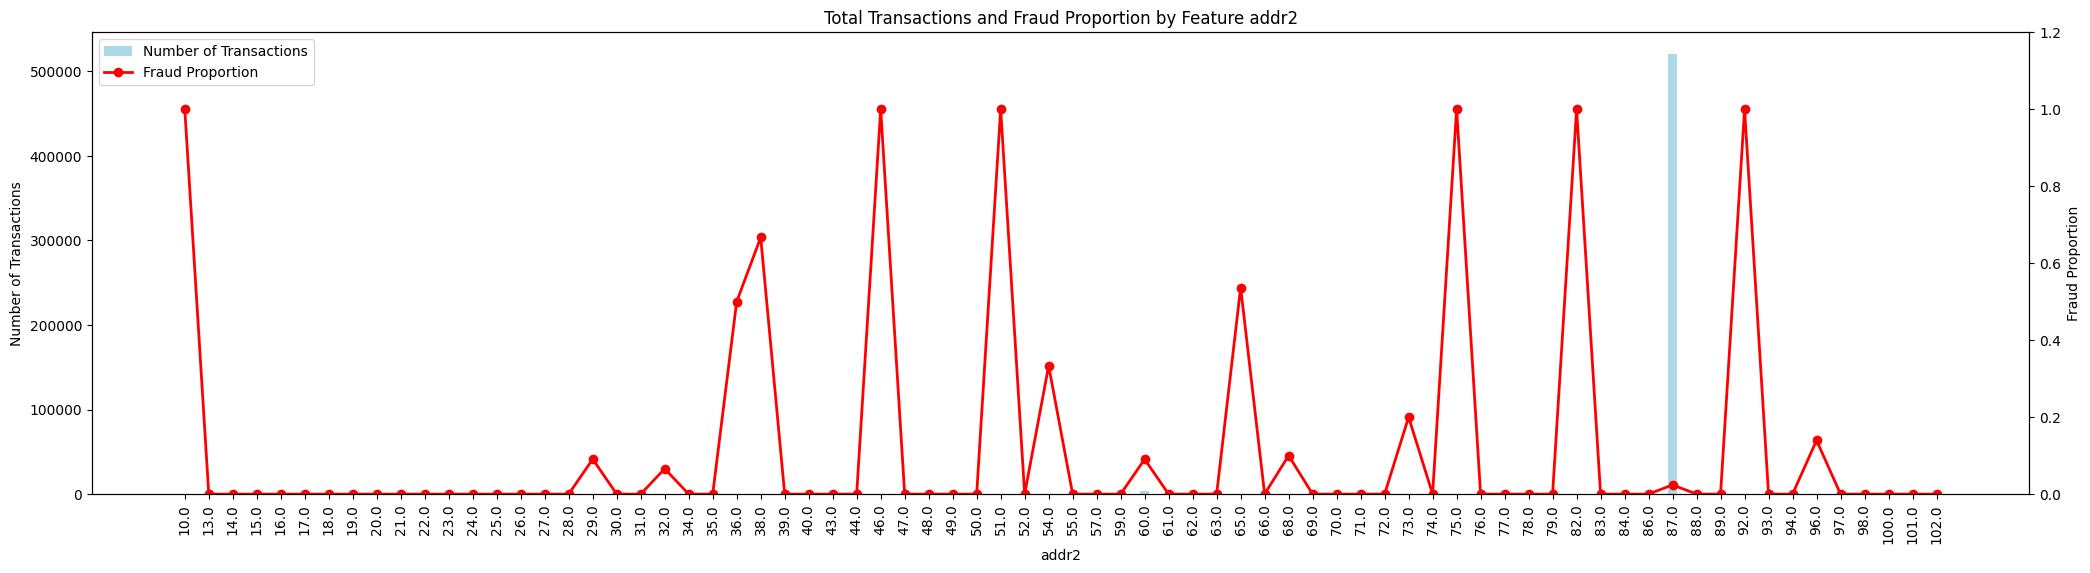

In [286]:
# plot_key_and_fraud_distribution(train_df, 'addr1', width=25)  # Subregion code. It's too noisy and has too many unique values.
plot_key_and_fraud_distribution(train_df, 'addr2', width=25) # Country code.

**Percentage of transactions coming from country code 87**

In [289]:

print(train_df[train_df['addr2'] == 87].shape[0] / train_df[~train_df['addr2'].isna()].shape[0])

0.9917059489286136


### Fraud Distribution based on M features

In [290]:
# for i in range(1, 10):
#     plot_key_and_fraud_distribution(train_df, f'M{i}', width=8)

### Fraud Distribution based on DeviceType

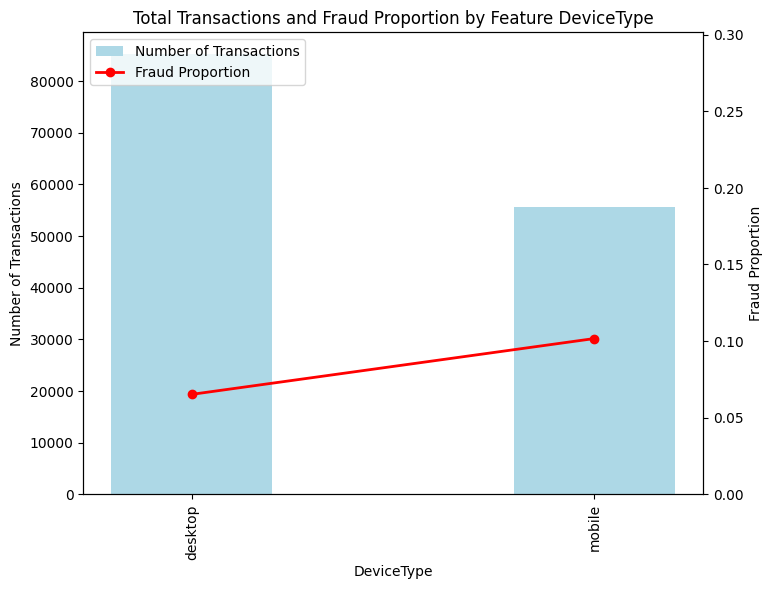

In [291]:
plot_key_and_fraud_distribution(train_df, 'DeviceType')

### Fraud Distribution of based on categorical ID features

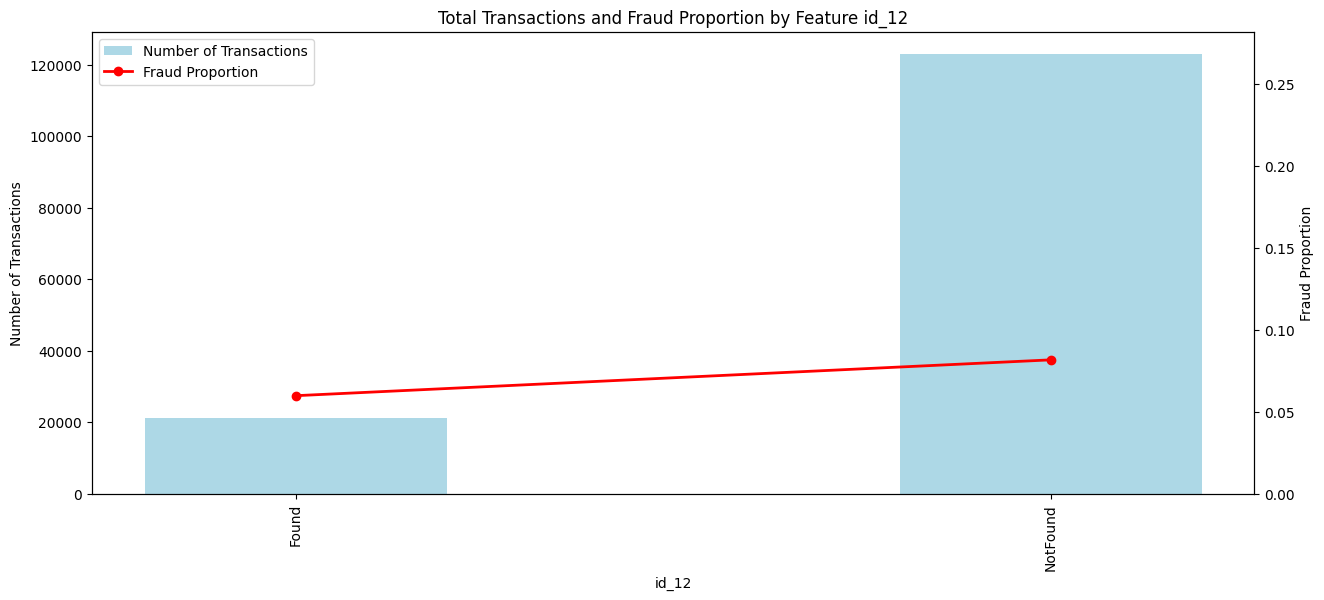

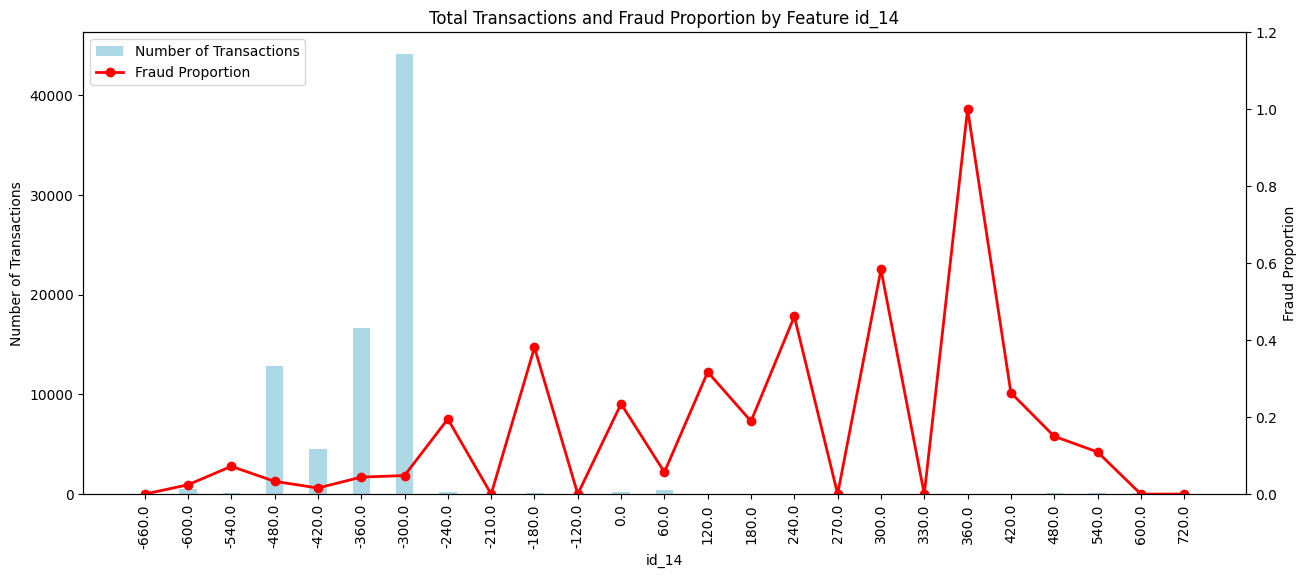

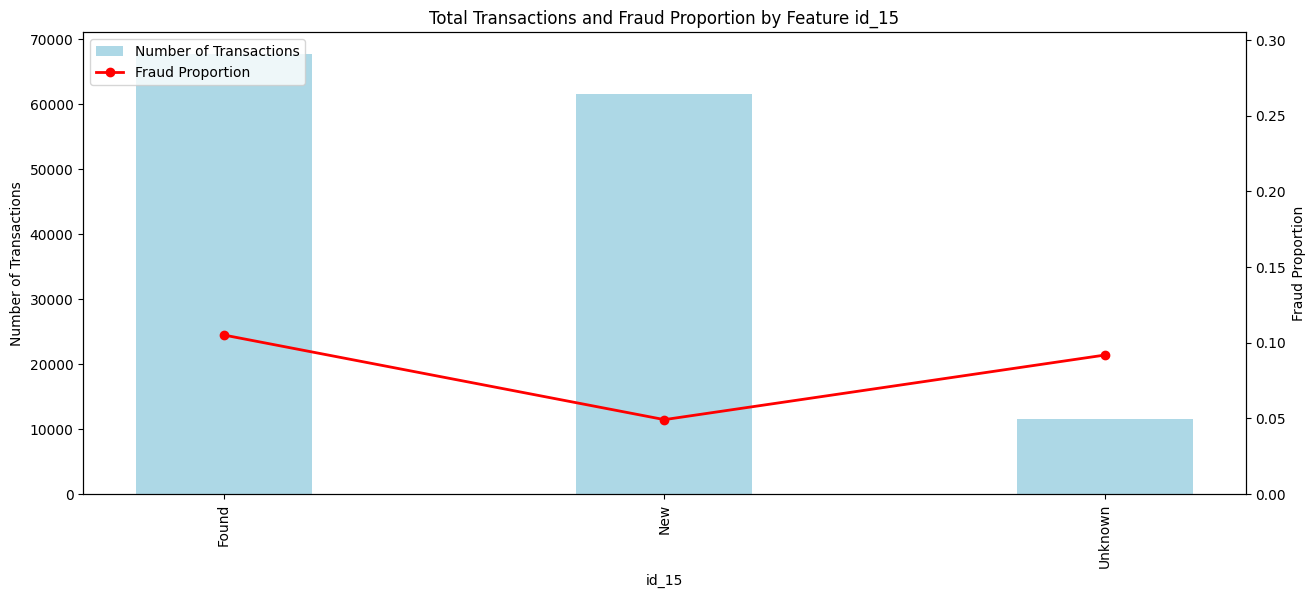

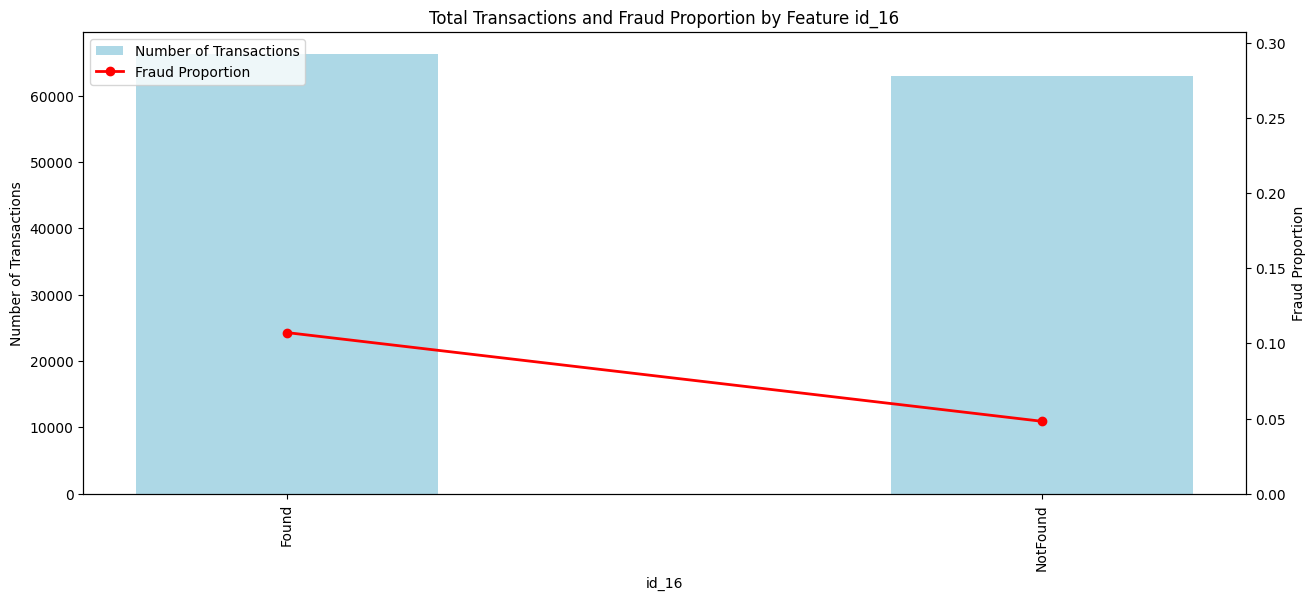

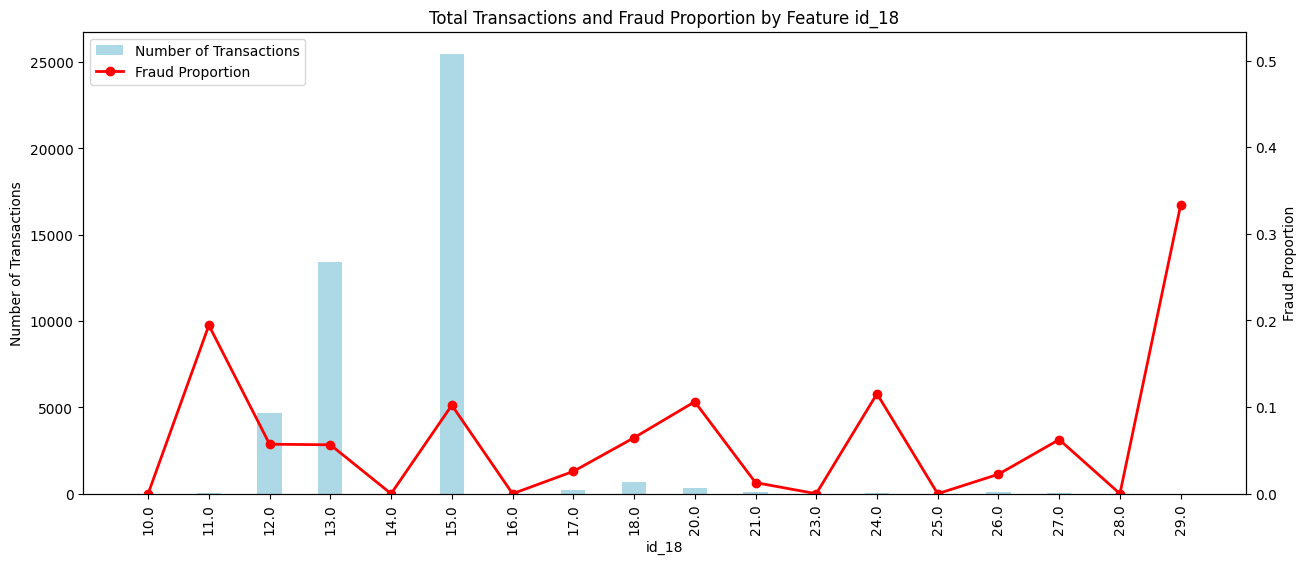

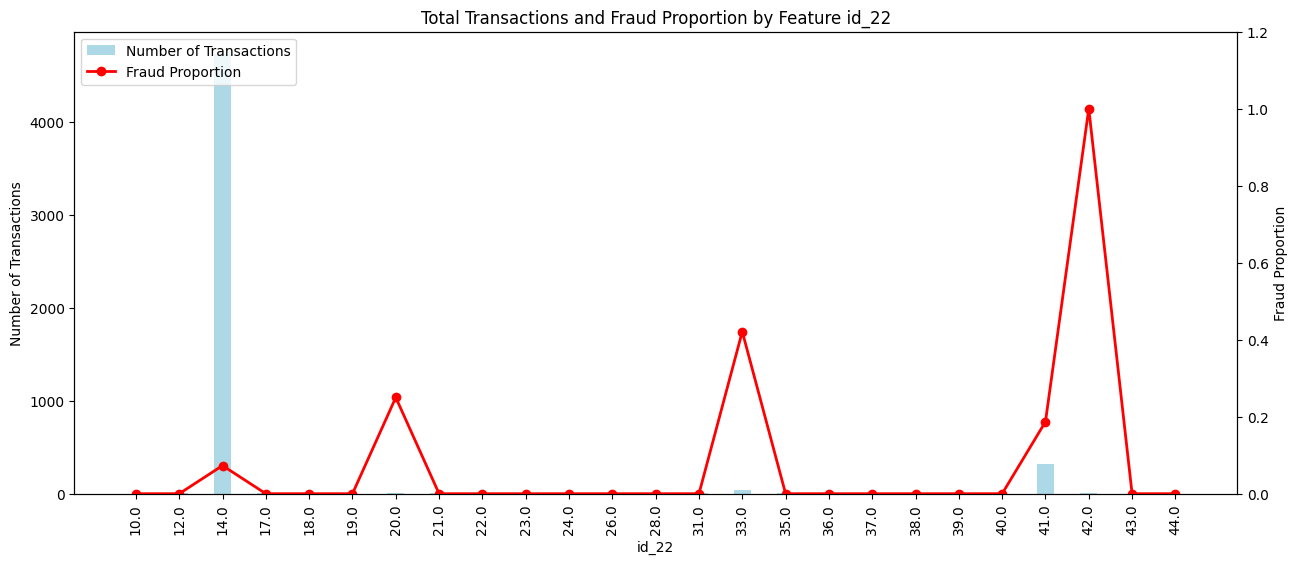

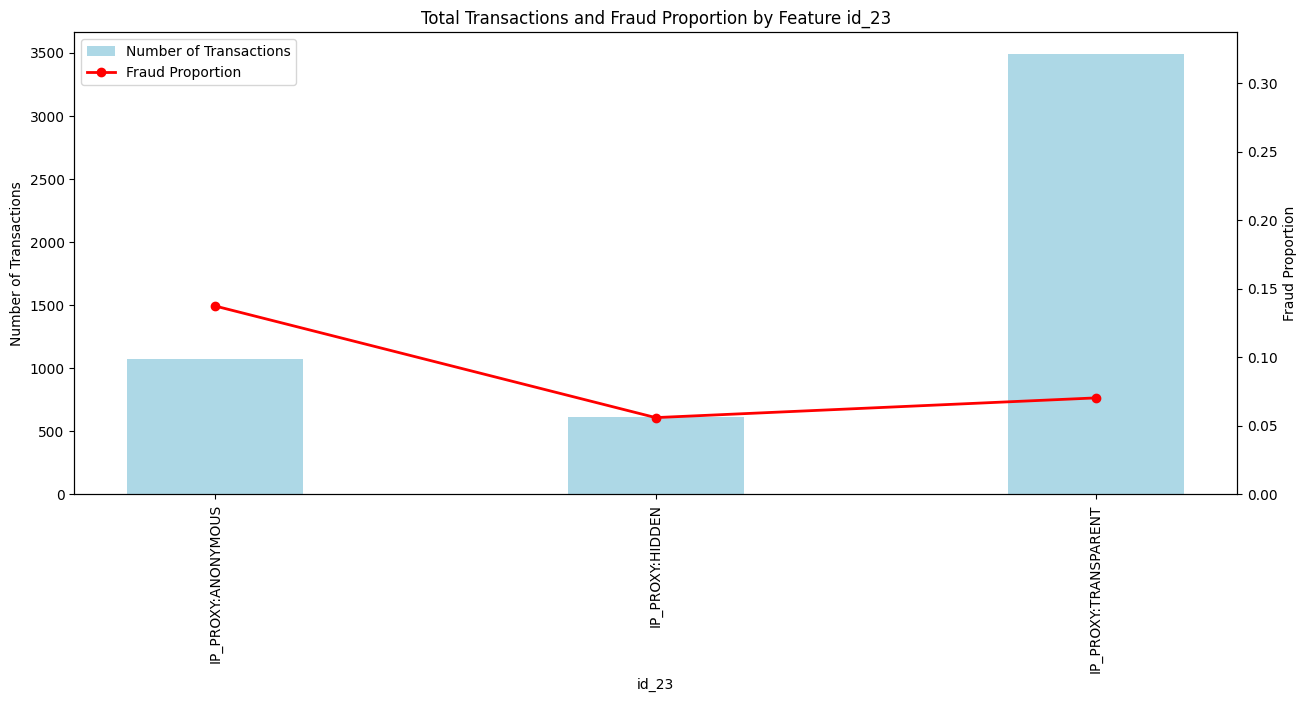

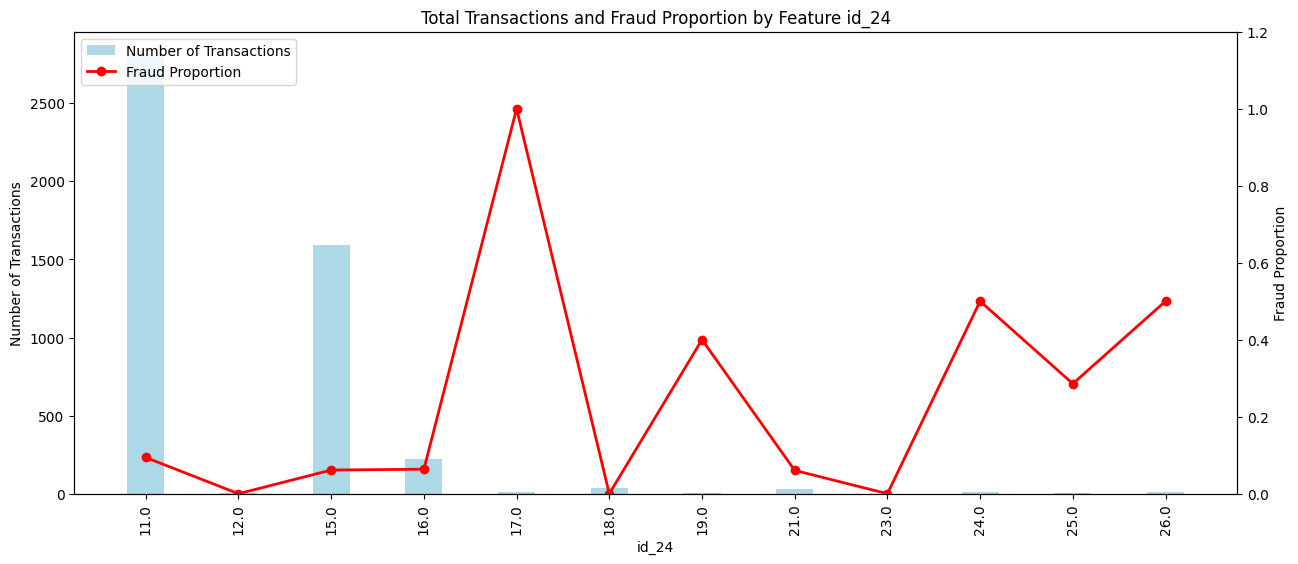

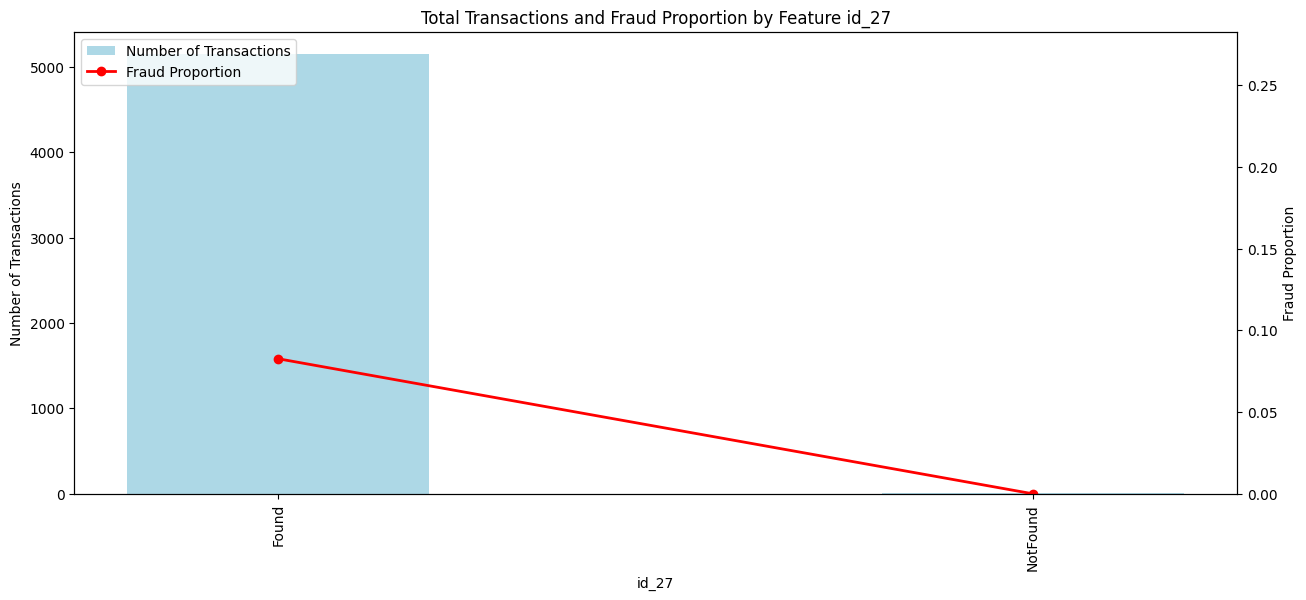

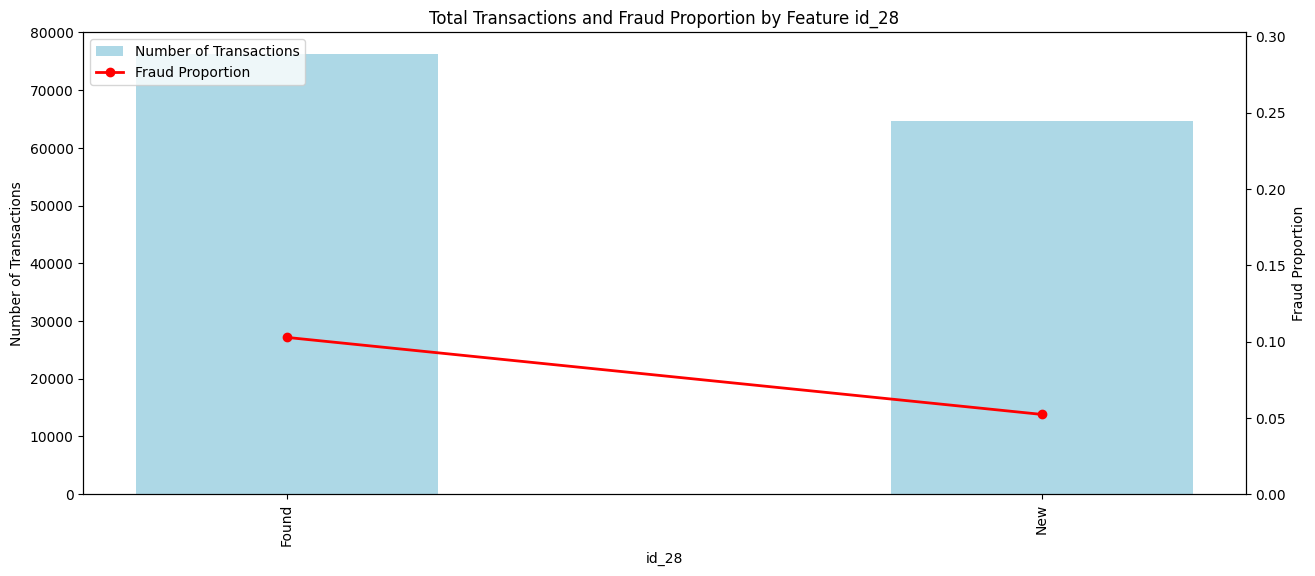

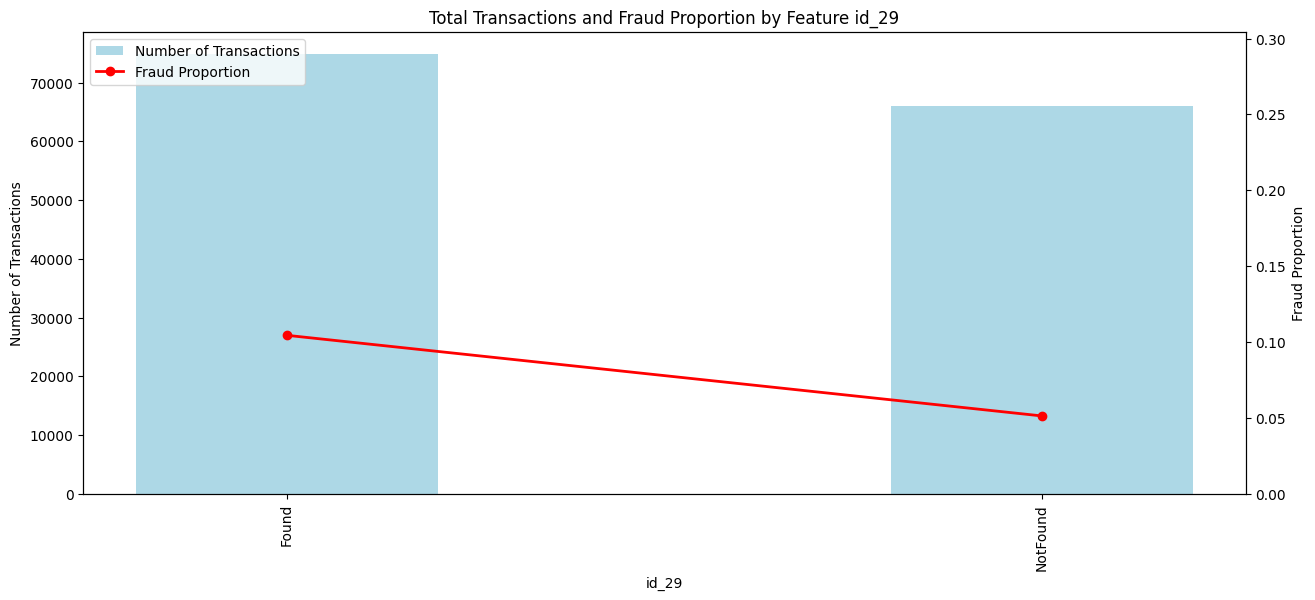

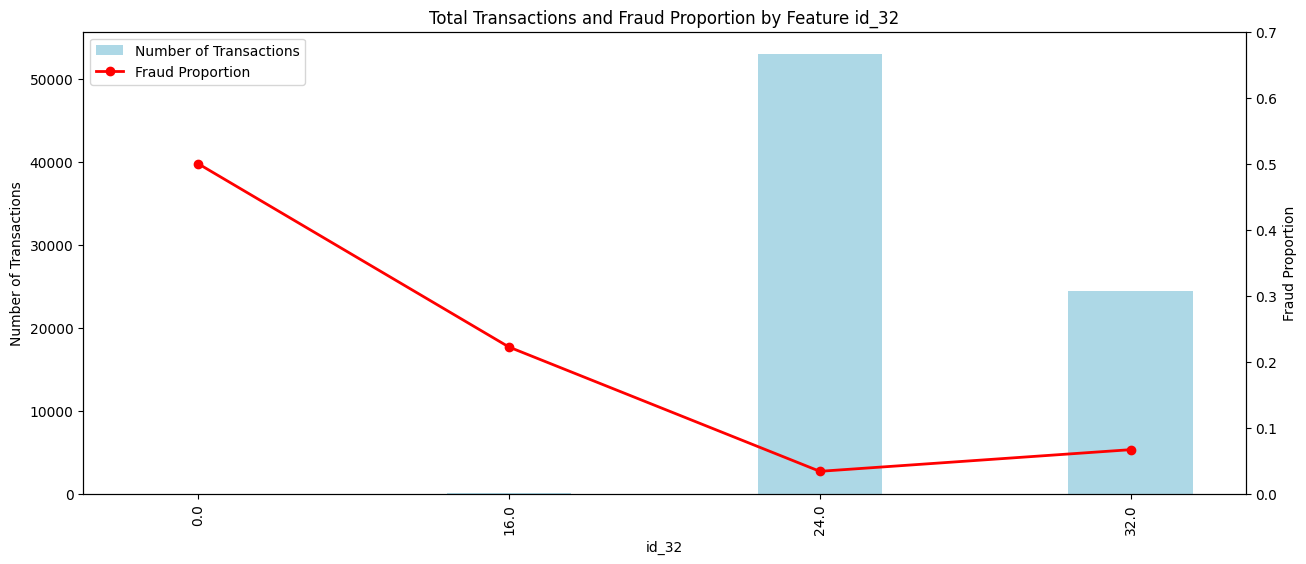

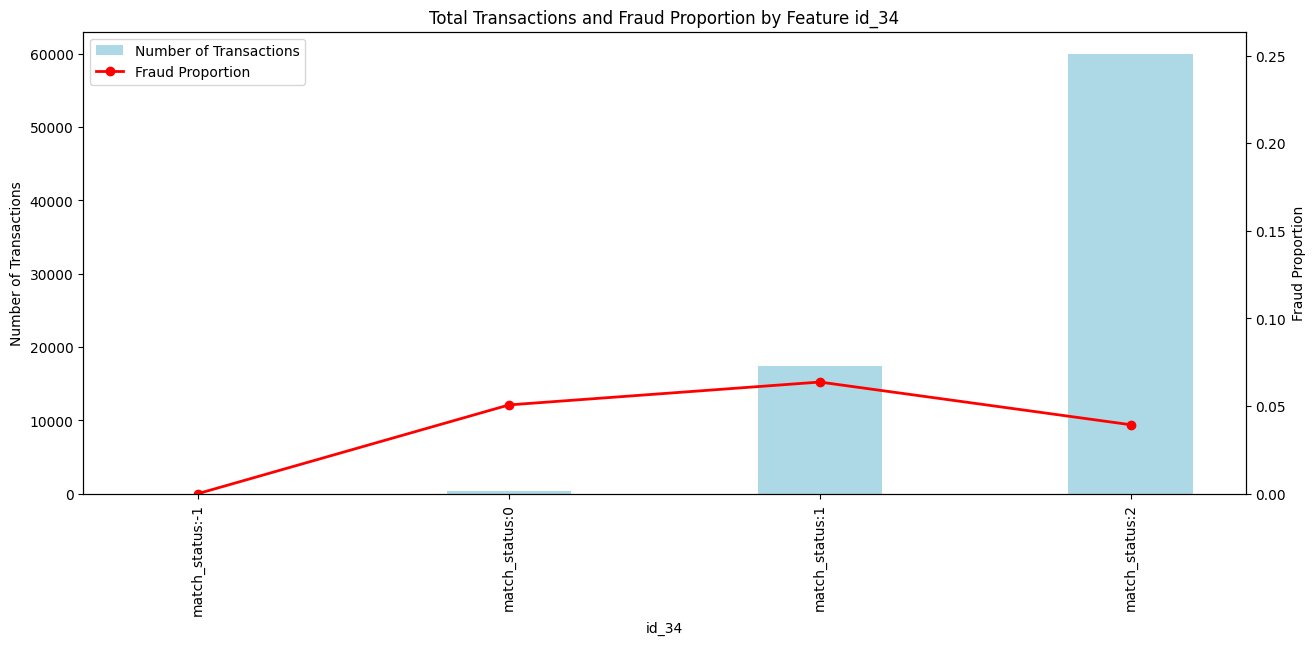

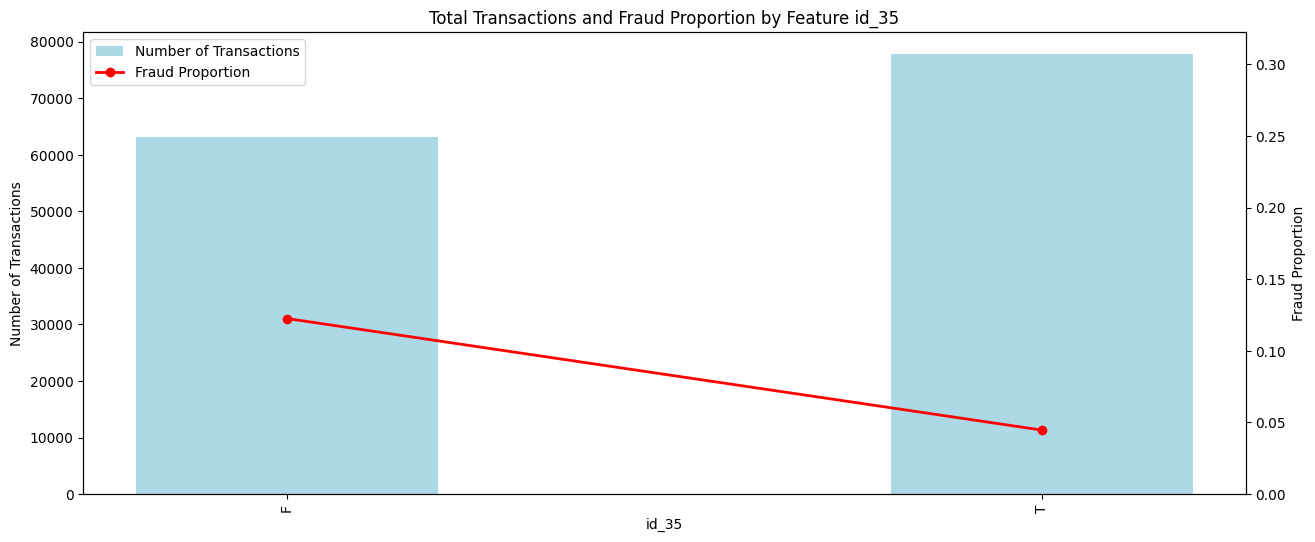

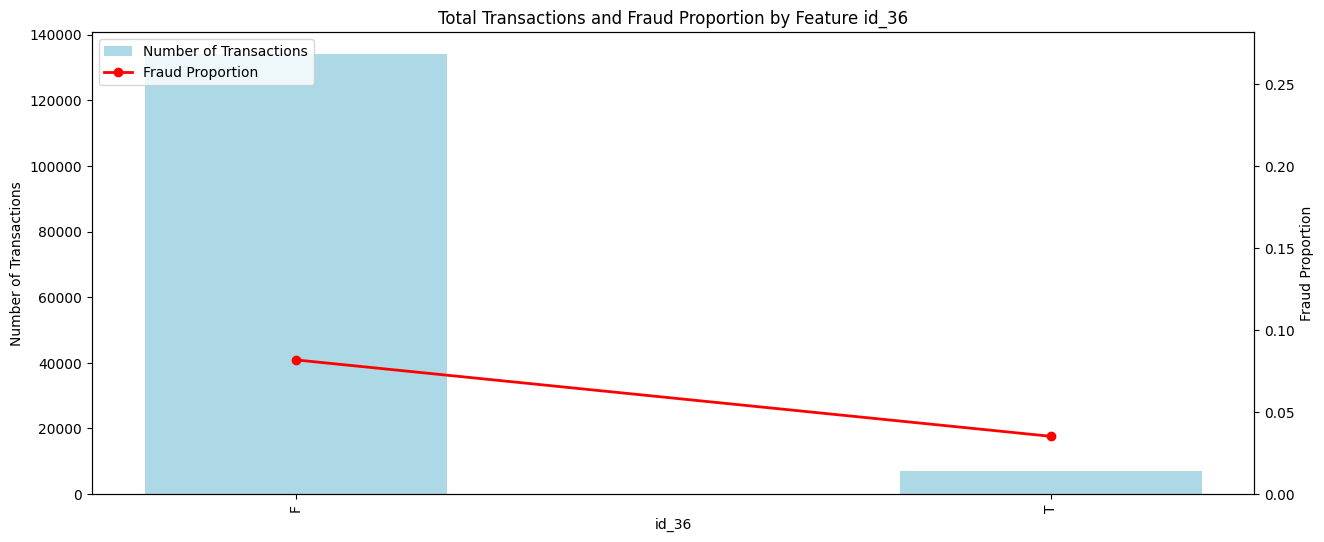

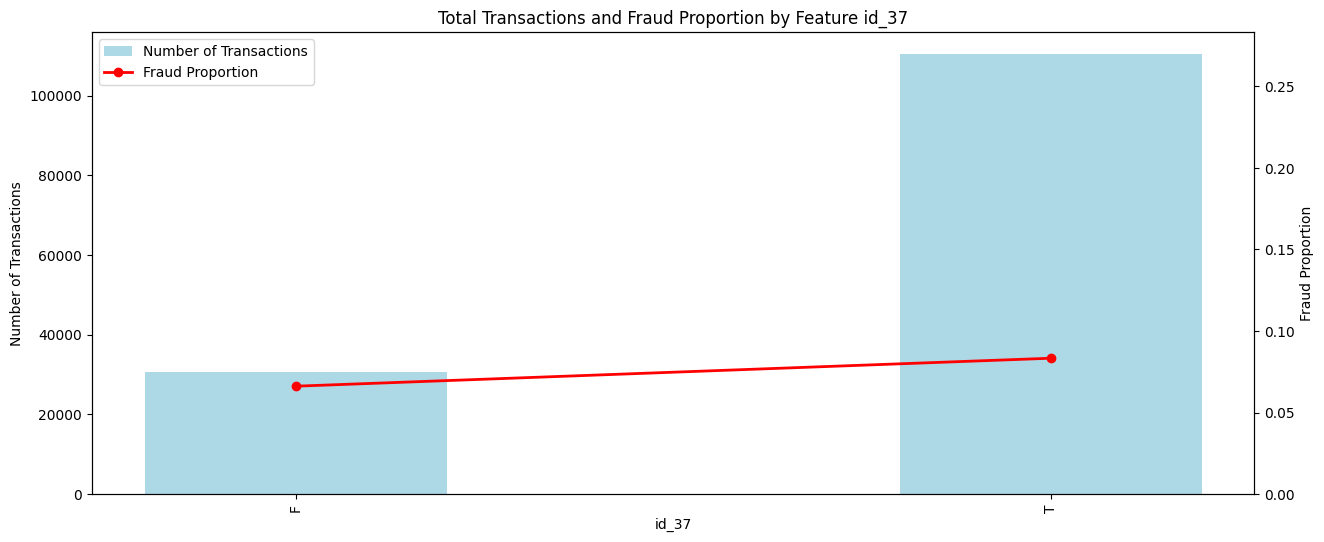

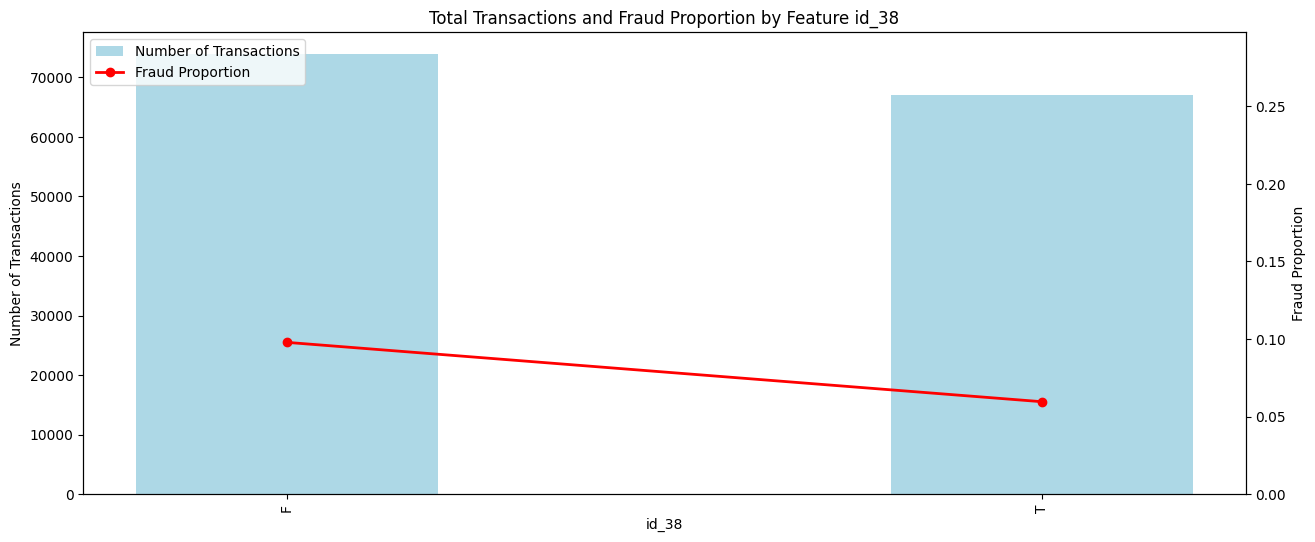

In [292]:
for i in range(12, 39):
    key = f'id_{i}'
    if train_df[key].unique().shape[0] < 50:
        plot_key_and_fraud_distribution(train_df, f'id_{i}', width=15)

### Distribution of transaction amount for fraud and non-fraud transactions

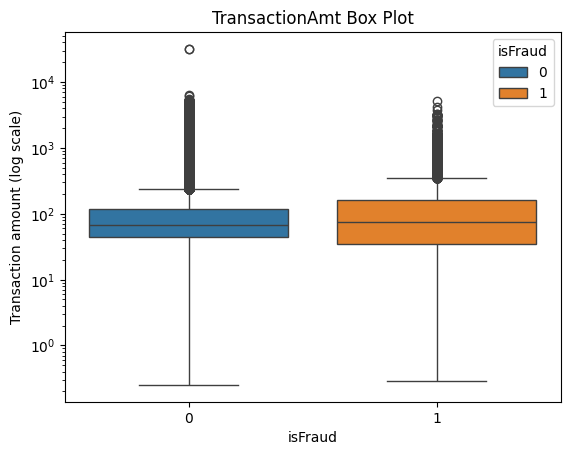

In [293]:
sns.boxplot(y='TransactionAmt', x='isFraud', data=train_df, hue='isFraud')
plt.title('TransactionAmt Box Plot')
plt.yscale('log')
plt.ylabel('Transaction amount (log scale)')
plt.show()

### Scatter plot of transaction amount and transaction time

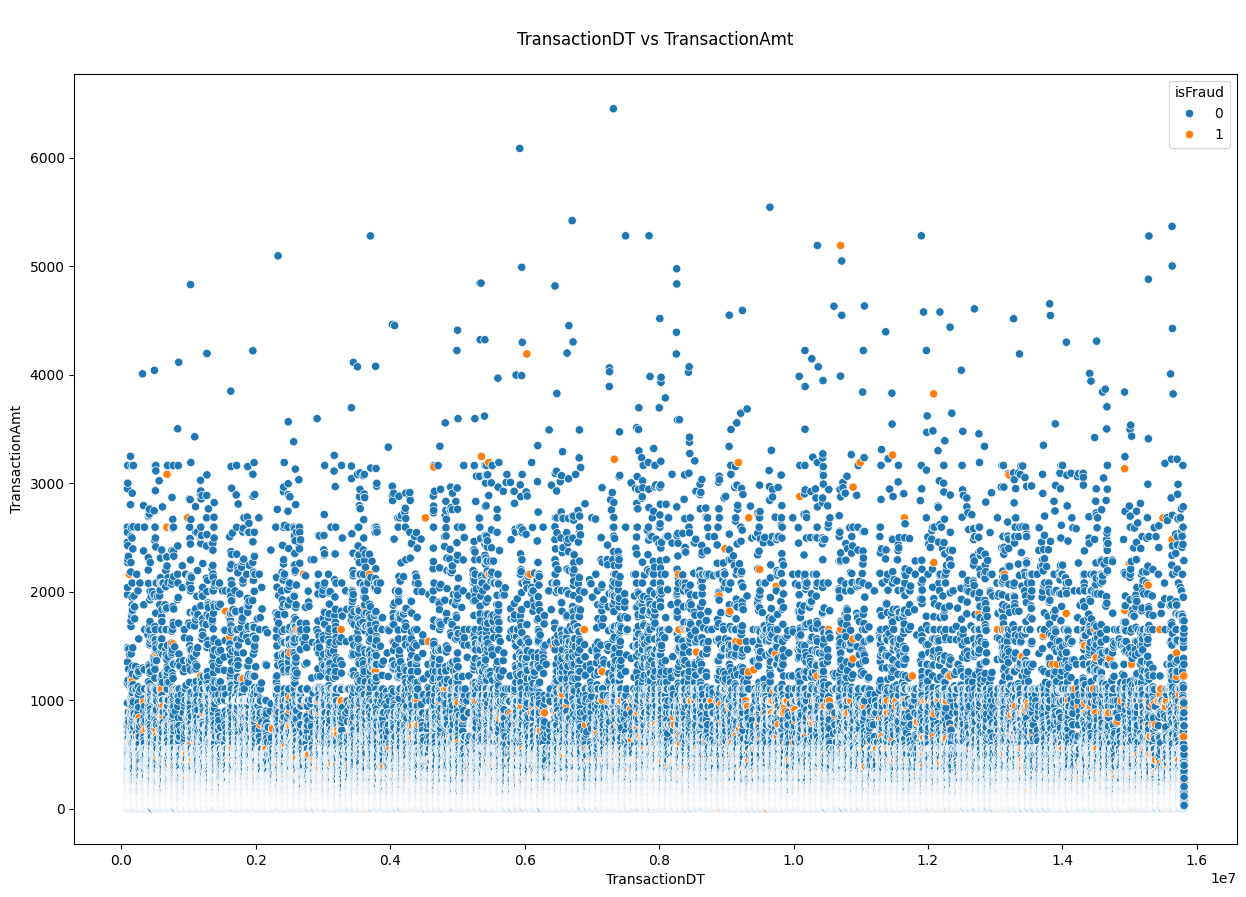

In [301]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TransactionDT', y='TransactionAmt', hue='isFraud', data=train_df[train_df['TransactionAmt'] < 30000]) # Remove outliers
plt.title("\nTransactionDT vs TransactionAmt\n")
plt.show()

**Fraud Distribution based on hour of the day and day of the week**

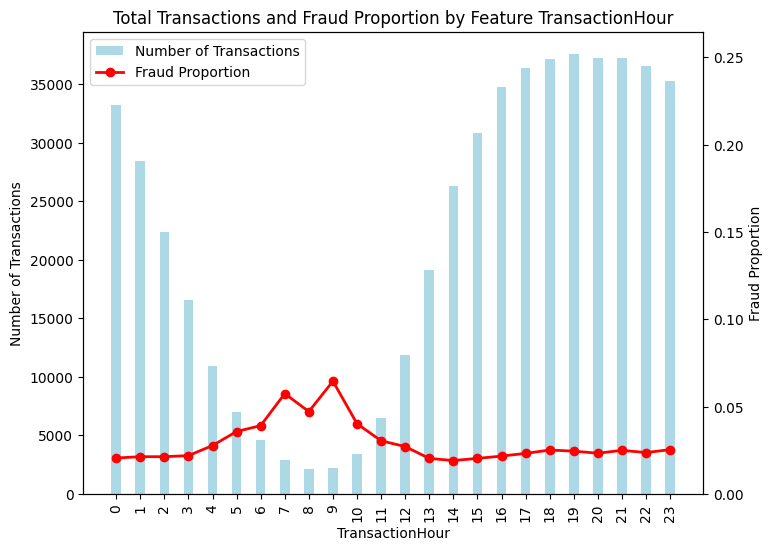

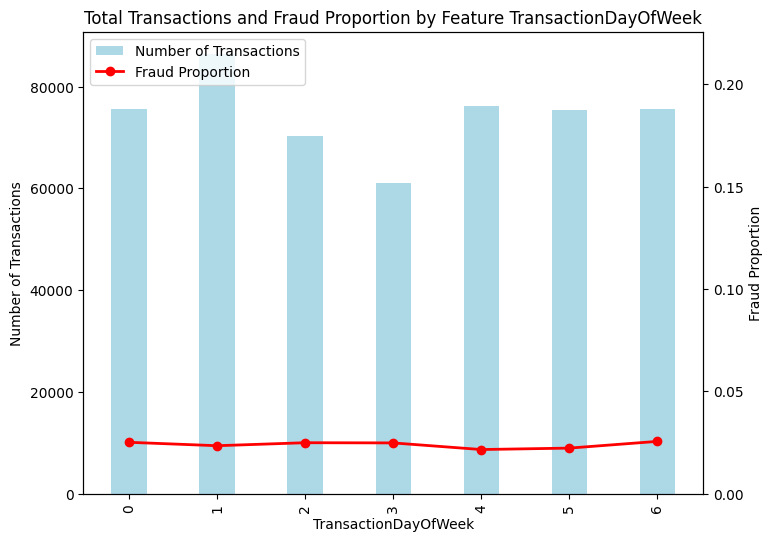

In [297]:
train_df['TransactionHour'] = (train_df['TransactionDT'] // (60 * 60)) % 24
train_df['TransactionDayOfWeek'] = (train_df['TransactionDT'] // (60 * 60 * 24)) % 7

# We are showing only one country which constitutes most of the data.
for group_key, group_df in train_df.groupby('addr2'):
    if int(group_key) == 87: # The country with most number of fraudulant cases.
        plot_key_and_fraud_distribution(group_df, 'TransactionHour')
        plot_key_and_fraud_distribution(group_df, 'TransactionDayOfWeek')